<a href="https://colab.research.google.com/github/manishramamoorthy/New-Machine-Learning-Projects/blob/main/Project_5_Boston_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summary :**

1) Importing Libraries                    
2) Loading Dataset                        
3) Data PreProcessing                              
4) EDA (Exploratory Data Analysis)                              
5) Train and Test Split                            
6) Standard Scaler                                 
7) Modelling                             
8) Making Prediction                               
9) Compare Actual and Predicted Scores                               
10) Evaluation Metrics                               

**1) Importing Libraries**

In [58]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn import metrics

**2) Loading Dataset**

In [59]:
import sklearn.datasets
house_price_dataset = sklearn.datasets.load_boston()
print(house_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

Loading a Pandas DataFrame

In [60]:
boston_data = pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

Adding the Target(price) column to the DataFrame

In [61]:
boston_data["price"] = house_price_dataset.target

**3) Data PreProcessing**

1) Top Five Rows of DataSet

In [62]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


2) Last Five Rows of DataSet

In [63]:
boston_data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


3) Shape of DataSet

In [64]:
boston_data.shape
print("Number of Rows: ",boston_data.shape[0])
print("Number of Columns: ",boston_data.shape[1])

Number of Rows:  506
Number of Columns:  14


4) data Types

In [65]:
boston_data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

5) Getting Information of DataSet

In [66]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


6) Checking Missing Values of DataSet

In [67]:
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

7) Droping Duplicates Values of Dataset

In [68]:
boston_data = boston_data.drop_duplicates()

8) Statistical Measures

In [69]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


10) IQR (Inter Quantile Range)        

    IQR = Q3-Q1           
    Upper Threshold = Q3 + (1.5 * IQR)
    Lower Threshold = Q1 - (1.5 * IQR)   

CRIM -> Crime Rate 

In [70]:
IQR = boston_data.CRIM.quantile(0.75) - boston_data.CRIM.quantile(0.25)
Upper_Threshold = boston_data.CRIM.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = boston_data.CRIM.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  9.06963875
Lower_Threshold :  -5.31051125


ZN ->  Land Zoned	

In [71]:
IQR = boston_data.ZN.quantile(0.75) - boston_data.ZN.quantile(0.25)
Upper_Threshold = boston_data.ZN.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = boston_data.ZN.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  31.25
Lower_Threshold :  -18.75


INDUS -> Proportion of Non-Retail Business Acres Per Town

In [72]:
IQR = boston_data.INDUS.quantile(0.75) - boston_data.INDUS.quantile(0.25)
Upper_Threshold = boston_data.INDUS.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = boston_data.INDUS.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  37.465
Lower_Threshold :  -14.175


CHAS -> Charles River Dummy Variable

In [73]:
IQR = boston_data.CHAS.quantile(0.75) - boston_data.CHAS.quantile(0.25)
Upper_Threshold = boston_data.CHAS.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = boston_data.CHAS.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  0.0
Lower_Threshold :  0.0


NOX	->  Nitric Oxides Concentration

In [74]:
IQR = boston_data.NOX.quantile(0.75) - boston_data.NOX.quantile(0.25)
Upper_Threshold = boston_data.NOX.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = boston_data.NOX.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  0.8865
Lower_Threshold :  0.18650000000000005


RM -> Average Number of Rooms

In [75]:
IQR = boston_data.RM.quantile(0.75) - boston_data.RM.quantile(0.25)
Upper_Threshold = boston_data.RM.quantile(0.75) + (1.5 * IQR)
aLower_Threshold = boston_data.RM.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  7.730500000000001
Lower_Threshold :  0.18650000000000005


AGE -> Age of a House

In [76]:
IQR = boston_data.AGE.quantile(0.75) - boston_data.AGE.quantile(0.25)
Upper_Threshold = boston_data.AGE.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = boston_data.AGE.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  167.64999999999998
Lower_Threshold :  -28.54999999999999


DIS	-> Weighted Distances of Employement Center

In [77]:
IQR = boston_data.DIS.quantile(0.75) - boston_data.DIS.quantile(0.25)
Upper_Threshold = boston_data.DIS.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = boston_data.DIS.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  9.820800000000002
Lower_Threshold :  -2.5322000000000005


RAD -> Radial Highways

In [78]:
IQR = boston_data.RAD.quantile(0.75) - boston_data.RAD.quantile(0.25)
Upper_Threshold = boston_data.RAD.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = boston_data.RAD.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  54.0
Lower_Threshold :  -26.0


TAX	-> Tax of House

In [79]:
IQR = boston_data.TAX.quantile(0.75) - boston_data.TAX.quantile(0.25)
Upper_Threshold = boston_data.TAX.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = boston_data.TAX.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  1246.5
Lower_Threshold :  -301.5


PTRATIO -> Pupil Teacher Ratio by Town

In [80]:
IQR = boston_data.PTRATIO.quantile(0.75) - boston_data.PTRATIO.quantile(0.25)
Upper_Threshold = boston_data.PTRATIO.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = boston_data.PTRATIO.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  24.4
Lower_Threshold :  13.199999999999998


B	-> The Equation B=1000(Bk — 0.63)² where Bk is the proportion of blacks 

In [81]:
IQR = boston_data.B.quantile(0.75) - boston_data.B.quantile(0.25)
Upper_Threshold = boston_data.B.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = boston_data.B.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  427.49625000000003
Lower_Threshold :  344.10624999999993


LSTAT -> The Percentage Lower Status of the Population.

In [82]:
IQR = boston_data.LSTAT.quantile(0.75) - boston_data.LSTAT.quantile(0.25)
Upper_Threshold = boston_data.LSTAT.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = boston_data.LSTAT.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  31.962500000000006
Lower_Threshold :  -8.057500000000005


**4) EDA (Exploratory Data Analysis)**

In [83]:
boston_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

CRIM -> Crime Rate

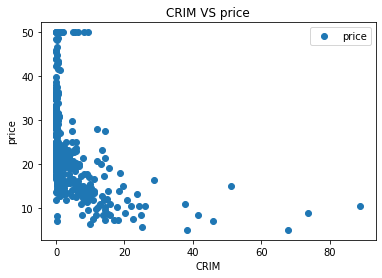

In [84]:
boston_data.plot(x="CRIM",y="price",style="o")
plt.title("CRIM VS price")
plt.xlabel("CRIM")
plt.ylabel("price")
plt.show()

AGE -> Age of a House

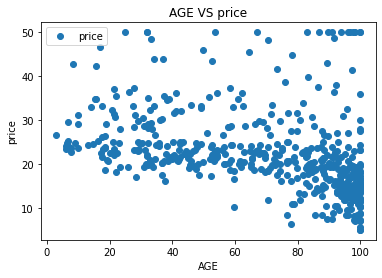

In [85]:
boston_data.plot(x="AGE",y="price",style="o")
plt.title("AGE VS price")
plt.xlabel("AGE")
plt.ylabel("price")
plt.show()

RM -> Average Number of Rooms

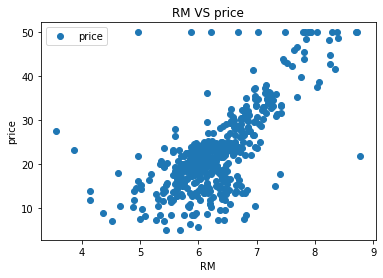

In [86]:
boston_data.plot(x="RM",y="price",style="o")
plt.title("RM VS price")
plt.xlabel("RM")
plt.ylabel("price")
plt.show()

DIS -> Weighted Distances of Employement Center

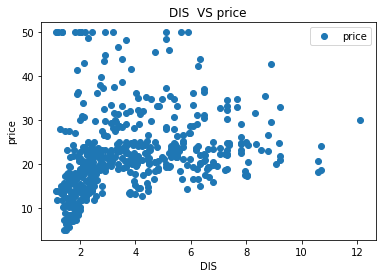

In [87]:
boston_data.plot(x="DIS",y="price",style="o")
plt.title("DIS  VS price")
plt.xlabel("DIS")
plt.ylabel("price")
plt.show()

TAX -> Tax of House

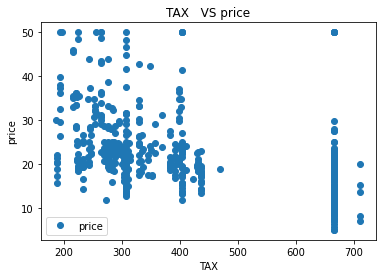

In [88]:
boston_data.plot(x="TAX",y="price",style="o")
plt.title("TAX   VS price")
plt.xlabel("TAX")
plt.ylabel("price")
plt.show()

PTRATIO -> Pupil Teacher Ratio by Town

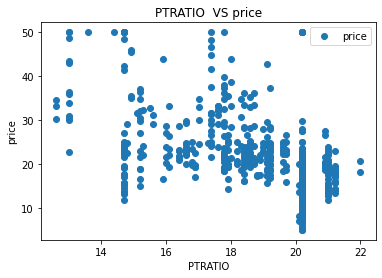

In [89]:
boston_data.plot(x="PTRATIO",y="price",style="o")
plt.title("PTRATIO  VS price")
plt.xlabel("PTRATIO")
plt.ylabel("price")
plt.show()

LSTAT -> The Percentage Lower Status of the Population.

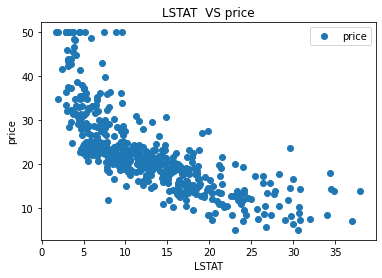

In [90]:
boston_data.plot(x="LSTAT",y="price",style="o")
plt.title("LSTAT  VS price")
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.show()

**5) Train and Test Split**

In [91]:
X = boston_data.drop(columns="price",axis=1)
y = boston_data["price"]

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=7)

**6) Standard Scaler**

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.05159004, -0.48938333,  1.02279165, ...,  0.83773352,
         0.35800775,  0.07002231],
       [-0.40601405, -0.48938333, -0.83961127, ...,  0.83773352,
         0.39843382, -0.30165321],
       [-0.38077884, -0.48938333, -0.5236808 , ...,  0.56228441,
         0.42278267,  0.00419048],
       ...,
       [ 0.92751363, -0.48938333,  1.02279165, ...,  0.83773352,
        -2.92139739,  1.44151869],
       [-0.40563304,  2.70407882, -1.16275477, ..., -0.03452199,
         0.40787046, -1.4783971 ],
       [-0.38996138,  0.44736557, -0.74295675, ...,  0.33274349,
         0.16426549, -0.44428883]])

**7) Modelling**

1) Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

2) XGBRegressor

In [95]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

[05:41:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

3)  Lasso Regression

In [96]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

**8) Making Prediction**

y = β0 + β1x1 +β2x2 +.....+ βnxn               

y -> Predict Target                  
x1,x2 -> Features                      
β1,β2,βn -> Parameters                       

m -> coef_                          
c -> intercept_                             

1) Linear Regression

In [97]:
lin_reg.coef_

array([-1.29372986e-01,  2.95904870e-02,  2.22928425e-02,  2.83744579e+00,
       -1.53954203e+01,  5.27557273e+00, -1.05383841e-02, -1.30170765e+00,
        2.66392896e-01, -1.09686702e-02, -9.64830193e-01,  1.08603361e-02,
       -3.78363465e-01])

In [98]:
lin_reg.intercept_

23.95674601756511

In [99]:
lin_reg.predict([[0.02729,18,7.07,0.0,0.469,6.421,65.2,4.9671,3.0,242.0,17.8,396.90,9.14]])

array([25.96764869])

2) Lasso Regression

In [100]:
lasso.coef_

array([-0.06267589,  0.03466656, -0.        ,  0.        , -0.        ,
        2.15024819,  0.02298128, -0.47449252,  0.22426362, -0.01417594,
       -0.71778079,  0.00821954, -0.66058438])

In [101]:
lasso.intercept_

31.48521613336888

In [102]:
lasso.predict([[0.02729,18,7.07,0.0,0.469,6.421,65.2,4.9671,3.0,242.0,17.8,396.90,9.14]])

array([26.7460825])

**9) Compare Actual and Predicted Scores**

1) Linear Regression

In [103]:
y_pred_1 = lin_reg.predict(X_test)
y_pred_1

array([23.1903541 , 18.97985889, 19.82548836, 19.00126197,  4.39524325,
       11.90230303, 21.24870187, 28.64449553, 29.03550064, 13.90644782,
        6.41422339, 32.65356658, 18.99884691, 20.01569489, 37.15275422,
       22.80485488, 29.04529555, 33.04200949, 10.48602033, 24.45472284,
       21.33069324, 27.60222354, 37.52118276, 13.6113556 ,  9.56442243,
       15.03368415, 35.5975585 , 26.01017573, 25.52430154, 27.06321433,
       19.07680237, 30.54746571, 31.27561168, 16.40132981, 39.76707419,
       20.27263903, 18.94934061, 17.12210014, 21.6262832 , 28.15101424,
       26.95292863, 19.14352801, 14.50664721, 25.78075705, 18.50460146,
       13.93439214, 24.96593139, 19.12431756, 20.6780475 ,  6.23807397,
       27.71460362, 26.74617711, 11.83361779, 40.10855118, 14.66523328,
       22.12023896, 20.34305401, 20.3786179 , 23.56685605, 21.91582872,
       20.79748126, 35.43123681, 17.32592458, 20.92077502, 24.1674162 ,
       43.38199388, 19.59747681, 20.11624895, 22.35462757, 28.12

In [104]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_1})
df

,Actual,Prediction
357,21.7,23.190354
337,18.5,18.979859
327,22.2,19.825488
13,20.4,19.001262
418,8.8,4.395243
...,...,...
221,21.7,24.811529
98,43.8,36.537602
435,13.4,14.720099
40,34.9,33.432762


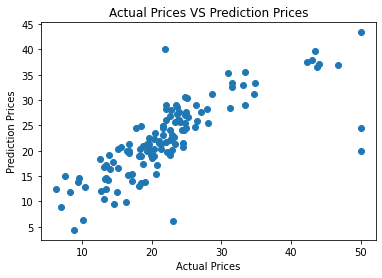

In [105]:
plt.scatter(y_test,y_pred_1)
plt.xlabel("Actual Prices")
plt.ylabel("Prediction Prices")
plt.title("Actual Prices VS Prediction Prices")
plt.show()

2) XGBRegressor

In [106]:
y_pred_2 = xgb.predict(X_test)
y_pred_2

array([19.981112 , 19.531939 , 20.793087 , 20.780977 ,  6.9433827,
       10.151997 , 19.574482 , 23.511484 , 23.653177 , 14.646108 ,
        9.20037  , 32.519096 , 16.534498 , 18.270128 , 41.75105  ,
       18.814259 , 24.787346 , 33.10514  , 15.329421 , 21.702503 ,
       17.176098 , 28.081484 , 43.984406 , 17.843037 , 14.192337 ,
       10.869142 , 33.471382 , 26.861063 , 24.491863 , 24.573313 ,
       19.69047  , 28.282892 , 31.073423 , 15.197302 , 49.08793  ,
       19.297222 , 20.24159  , 16.138443 , 21.367142 , 26.483822 ,
       22.63085  , 14.711525 , 13.66119  , 26.379799 , 16.747663 ,
       10.603122 , 22.326036 , 19.981112 , 17.627445 , 20.698418 ,
       25.948627 , 24.454004 , 20.910267 , 46.908    , 12.272801 ,
       19.981112 , 18.6119   , 21.061533 , 22.629456 , 20.960018 ,
       20.722565 , 33.944916 , 19.341446 , 21.428942 , 20.82399  ,
       46.964878 , 16.428059 , 20.194384 , 21.991415 , 27.235308 ,
       22.71015  ,  9.639583 , 19.601215 , 35.112114 , 21.6654

In [107]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_2})
df

,Actual,Prediction
357,21.7,19.981112
337,18.5,19.531939
327,22.2,20.793087
13,20.4,20.780977
418,8.8,6.943383
...,...,...
221,21.7,18.989561
98,43.8,42.713791
435,13.4,10.554292
40,34.9,34.349323


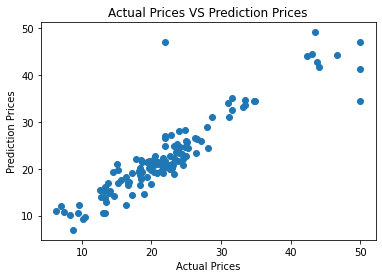

In [108]:
plt.scatter(y_test,y_pred_2)
plt.xlabel("Actual Prices")
plt.ylabel("Prediction Prices")
plt.title("Actual Prices VS Prediction Prices")
plt.show()

3) Lasso Regression

In [109]:
y_pred_3 = lasso.predict(X_test)
y_pred_3

array([21.79002372, 22.58055119, 20.78232591, 22.70169201,  9.08417615,
       14.47522024, 21.00968631, 28.24175414, 29.79421087, 14.92476962,
        6.90408526, 30.98169367, 19.58460108, 19.37063061, 35.33398443,
       20.64122658, 27.48149032, 30.82004534,  9.26215394, 24.47000777,
       18.53822928, 28.36184616, 34.25231365, 16.31302686, 12.0047069 ,
       11.19531907, 32.96513091, 27.24007143, 24.64896723, 26.52328915,
       20.64080265, 30.68465784, 29.86808739, 15.93395984, 37.2214551 ,
       19.68294194, 20.1463384 , 16.52575395, 22.28029968, 26.46590671,
       26.58052656, 15.40388826, 14.15252994, 25.20319092, 19.77851352,
       11.91578642, 26.69173177, 21.32235541, 21.22047003, 14.2420677 ,
       27.57074541, 26.9289189 , 17.07172341, 32.00974638, 15.41245239,
       22.06721908, 19.948642  , 20.41302112, 25.97608295, 22.38539392,
       20.36535763, 32.91692256, 20.96885481, 23.94733426, 25.30814236,
       38.8349464 , 20.13161567, 21.60543416, 24.51965006, 29.68

In [110]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_3})
df

,Actual,Prediction
357,21.7,21.790024
337,18.5,22.580551
327,22.2,20.782326
13,20.4,22.701692
418,8.8,9.084176
...,...,...
221,21.7,19.390988
98,43.8,31.976849
435,13.4,13.178693
40,34.9,32.895689


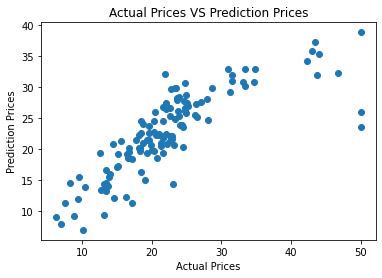

In [111]:
plt.scatter(y_test,y_pred_3)
plt.xlabel("Actual Prices")
plt.ylabel("Prediction Prices")
plt.title("Actual Prices VS Prediction Prices")
plt.show()

**10) Evaluation Metrics**

1) Linear Regression

In [112]:
from sklearn import metrics
print("R2-Scores: ",metrics.r2_score(y_test,y_pred_1))

R2-Scores:  0.6170003090082024


2) XGBRegressor

In [113]:
from sklearn import metrics
print("R2-Scores: ",metrics.r2_score(y_test,y_pred_2))

R2-Scores:  0.8336151264143024


3) Lasso Regression

In [114]:
from sklearn import metrics
print("R2-Scores: ",metrics.r2_score(y_test,y_pred_3))

R2-Scores:  0.662485547824962
